In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../input/islamabad-house-prices/isb_data.csv")
df.shape

(11870, 6)

In [3]:
df.head()

,Unnamed: 0,price,location,baths,bedrooms,Total_Area
0,2,165.0,G-15,6,5,2178.008
1,3,435.0,Bani Gala,4,4,10890.000
2,4,70.0,DHA Defence,3,3,2178.008
3,5,345.0,Ghauri Town,8,8,87120.000
4,6,270.0,Korang Town,8,8,5445.000


# Data Exploration

In [4]:
df.describe(include='all')

,Unnamed: 0,price,location,baths,bedrooms,Total_Area
count,11870.000000,11870.000000,11870,11870.000000,11870.000000,1.187000e+04
unique,NaN,NaN,175,NaN,NaN,NaN
top,NaN,NaN,DHA Defence,NaN,NaN,NaN
freq,NaN,NaN,1420,NaN,NaN,NaN
mean,77402.770093,353.800546,NaN,4.012890,4.222157,4.214460e+04
std,47848.583083,441.489680,NaN,2.676841,2.324489,3.109849e+06
min,2.000000,0.000010,NaN,0.000000,0.000000,0.000000e+00
25%,37311.250000,120.000000,NaN,2.000000,3.000000,1.633506e+03
50%,72717.000000,200.000000,NaN,4.000000,4.000000,2.722510e+03
75%,114410.250000,425.000000,NaN,6.000000,6.000000,1.089000e+04


In [5]:
df.isnull().sum()

Unnamed: 0    0
price         0
location      0
baths         0
bedrooms      0
Total_Area    0
dtype: int64

In [6]:
df.dtypes

Unnamed: 0      int64
price         float64
location       object
baths           int64
bedrooms        int64
Total_Area    float64
dtype: object

In [7]:
df['location'].nunique

<bound method IndexOpsMixin.nunique of 0               G-15
1          Bani Gala
2        DHA Defence
3        Ghauri Town
4        Korang Town
            ...     
11865    Soan Garden
11866           G-13
11867    Soan Garden
11868            F-7
11869           D-12
Name: location, Length: 11870, dtype: object>

In [8]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()

In [9]:
temp

,data_type,null_count,unique_count
Unnamed: 0,int64,0,11870
price,float64,0,521
location,object,0,175
baths,int64,0,14
bedrooms,int64,0,15
Total_Area,float64,0,160


# Data Visualization

Text(0, 0.5, 'Value Count')

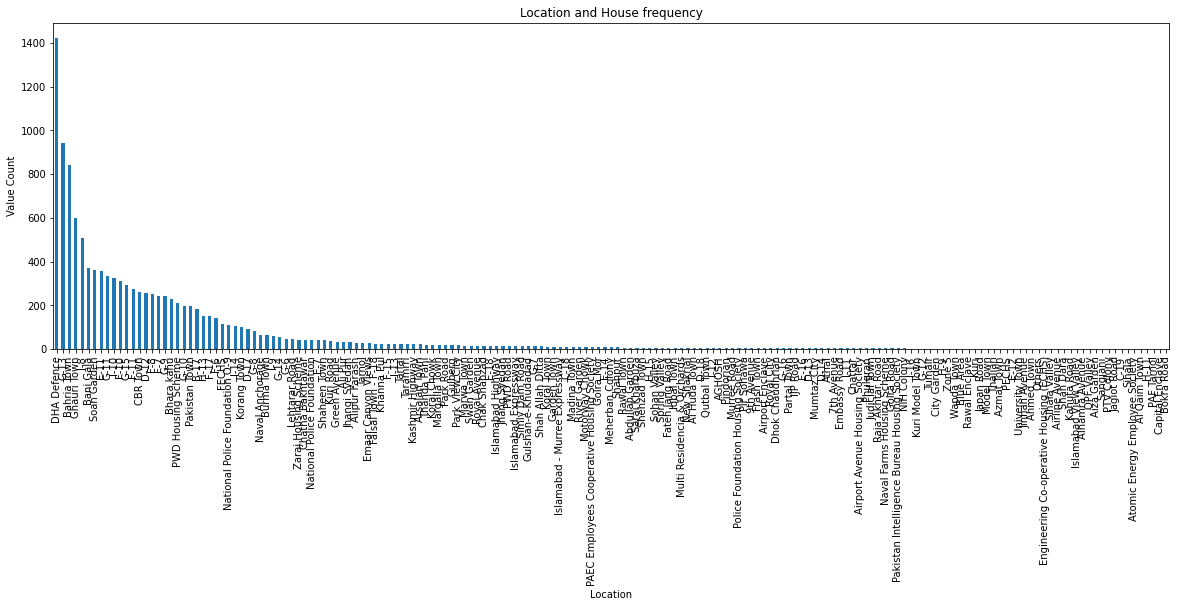

In [10]:
plt.figure(figsize=(20,6))
df['location'].value_counts().plot(kind='bar')
plt.title('Location and House frequency')
plt.xlabel('Location')
plt.ylabel('Value Count')

Text(0, 0.5, 'Count')

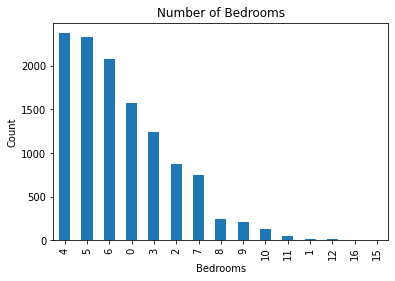

In [11]:
df['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

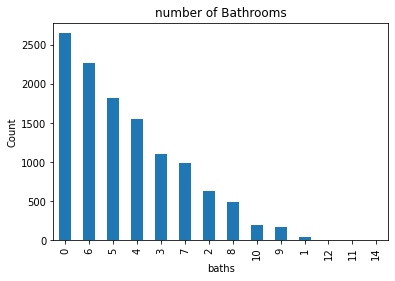

In [12]:
df['baths'].value_counts().plot(kind='bar')
plt.title('number of Bathrooms')
plt.xlabel('baths')
plt.ylabel('Count')

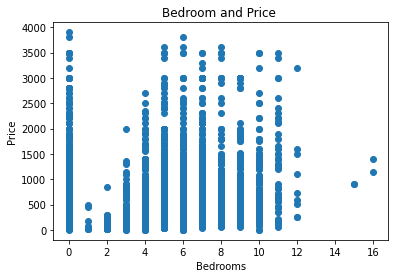

In [13]:
plt.scatter(df.bedrooms,df.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

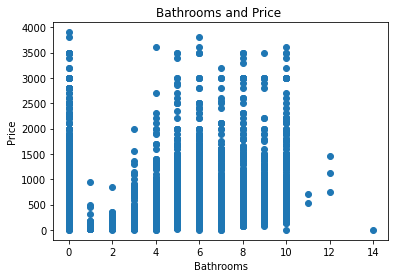

In [14]:
plt.scatter(df.baths,df.price)
plt.title("Bathrooms and Price ")
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.show()

<AxesSubplot:xlabel='price', ylabel='Total_Area'>

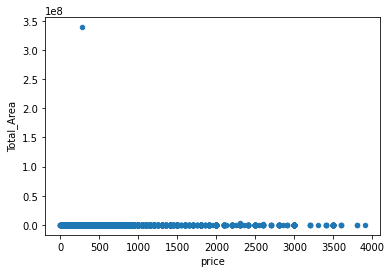

In [15]:
df.plot.scatter('price','Total_Area')

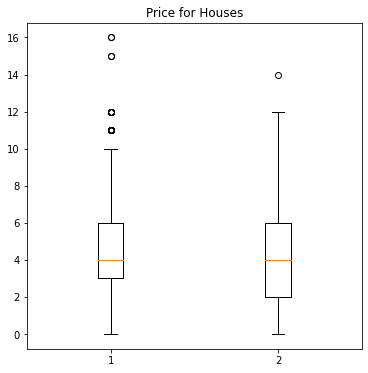

In [16]:
ax = plt.figure(figsize=(6,6)).add_subplot(111)
ax.set_title('Price for Houses')

bp = ax.boxplot([df['bedrooms'], df['baths']])

In [17]:
X = df[['Total_Area', 'price', 'bedrooms','baths']]

y = df['price']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr = LinearRegression()

In [22]:
lr.fit(X_train,y_train)

LinearRegression()

In [23]:
print(lr.intercept_)

-1.5836576494621113e-10


In [24]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total_Area,2.594258e-15
price,1.000000e+00
bedrooms,4.527628e-16
baths,-1.457168e-16


In [25]:
predictions = lr.predict(X_test)

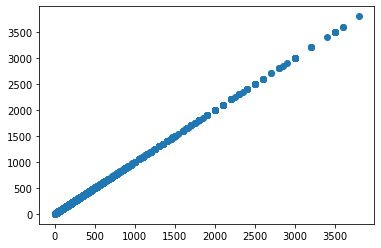

In [26]:
plt.scatter(y_test,predictions)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


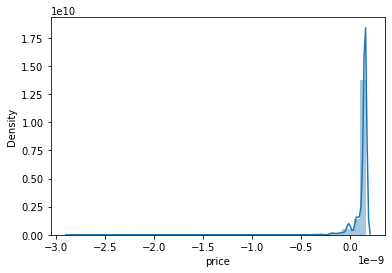

In [27]:
import seaborn as sns
sns.distplot((y_test-predictions),bins=50);

In [28]:
from sklearn import metrics

In [29]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.3505905999961572e-10
MSE: 2.150877635927042e-20
RMSE: 1.46658707069408e-10
